<a href="https://colab.research.google.com/github/JayR3d/Inventory-Optimization-Template-Periodic-replenishment-policy-Simulation-/blob/main/Inventory_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inventory Optimization Template ( Periodic replenishment policy & Simulation )




Products are ordered periodically, based on a fixed schedule and an up-to level.

At the beginning of any review period, we need to order enough products to bring our net inventory up to level S.

The order quantity depends on how much stock we have when we make the order and is therefore variable. On the other hand, the orders are made following a fixed schedule: the elapsed time between two consecutive orders will always be the same.

R being the fixed review period and S the up-to level.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

Defining the duration of our simulation.

In [ ]:
# time refers to sample size
time = 200
# d_mu refers to demand average
d_mu = 100
# d_std refers to demand standard deviation
d_std = 25

#Demand duration for the simulation
d = np.maximum(np.random.normal(d_mu, d_std, time).round(0).astype(int),0)

Define Fixed review, Lead time, service level target and demand deviation over the risk-horizon.

In [ ]:
# R = Fixed review period
# L = Lead time (periods)
# alpha = service level target
L, R, alpha = 4, 1, 0.95

# z = service level target
z = norm.ppf(alpha)

# The demand deviation over the risk-horizon (Maximum period of time that you need to wait to receive an order)
x_std = np.sqrt(L+R)*d_std

#Inventory levels

In [ ]:
# Ss = Stock protecting the supply chain against demand variability (or forecast error) and supply lack of reliability.
Ss = np.round(x_std*z).astype(int)

# Cs = Stock needed to fulfill the expected demand (or forecast) over a replenishment cycle.
Cs = 1/2 * d_mu * R

# Is = Inventory in transit in between different locations.
Is = d_mu * L

# S = At the beginning of any review period, we need to order enough products to bring our net inventory up to level S
S = Ss + 2*Cs + Is

In [ ]:
# On-Hand
hand = np.zeros(time, dtype=int)
# Define transit as a 2-dimensional array.
transit = np.zeros((time,L+1), dtype=int)

Service Levels

In [ ]:
# Stock_out_period = Contain a Boolean that flags if there is a shortage during a period.
stock_out_period = np.full(time, False, dtype=bool)
# Stock-out_cycle = Contain a Boolean for each order cycle (i.e., review period) that flags if we had a shortage at any time during the last cycle.
stock_out_cycle = []

Simulation Initialization

In [ ]:
# The initial on-hand and net inventories during the first period
hand[0] = S - d[0]
# in-transit stock is initialized for the second period as the demand in the first period.
transit[1,-1] = d[0]

#Simulate an Inventory Policy

In [ ]:
for t in range(1,time):
  if transit[t-1,0]>0:
    stock_out_cycle.append(stock_out_period[t-1])
  hand[t] = hand[t-1] - d[t] + transit[t-1,0]
  stock_out_period[t] = hand[t] < 0
  transit[t,:-1] = transit[t-1,1:]
  if 0==t%R:
    net = hand[t] + transit[t].sum()
    transit[t,L] = S - net

Reporting

     Demand  On−hand               In−transit
5       126      -19  [85, 225, 101, 74, 126]
6        71       -5  [225, 101, 74, 126, 71]
7       105      115  [101, 74, 126, 71, 105]
8        83      133   [74, 126, 71, 105, 83]
9        95      112   [126, 71, 105, 83, 95]
..      ...      ...                      ...
195     119       27  [86, 127, 79, 154, 119]
196      74       39  [127, 79, 154, 119, 74]
197      95       71   [79, 154, 119, 74, 95]
198     126       24  [154, 119, 74, 95, 126]
199     123       55  [119, 74, 95, 126, 123]

[195 rows x 3 columns]


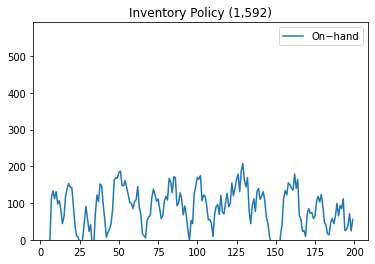

In [ ]:
df = pd.DataFrame(data= {'Demand':d, 'On−hand':hand, 'In−transit':list(transit)})
df = df.iloc[R+L:,:] #Remove initialization periods
print(df)
df['On−hand'].plot(title='Inventory Policy (%d,%d)' %(R,S), ylim=(0,S), legend=True)

Print cycle and period service levels

In [ ]:
print('Alpha:',alpha*100)
SL_alpha = 1-sum(stock_out_cycle)/len(stock_out_cycle)
print('Cycle Service Level:', round(SL_alpha*100,1))
SL_period = 1-sum(stock_out_period)/time
print('Period Service Level:', round(SL_period*100,1))

Alpha: 95.0
Cycle Service Level: 93.3
Period Service Level: 93.5
